<a href="https://colab.research.google.com/github/Malikumair786/Machine_Learning/blob/main/project8_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow:

Gold Price data --> data preprocessing --> data Analysis --> train test split --> Random Forest Regressor --> Evaluation

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
#Loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
# getting athe basic info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation
2. Negative Correlation

In [8]:
correlation =gold_data.corr()

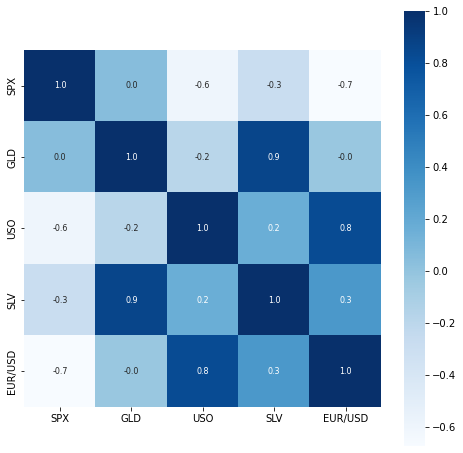

In [9]:
#constructing heatmap to understand the corealtion
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [12]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


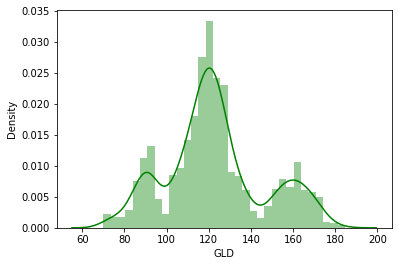

In [16]:
#cjecking the distribution of gold size
sns.distplot(gold_data['GLD'], color = 'Green')

Spliting the feature and target

In [17]:
X = gold_data.drop(['Date','GLD'],axis = 1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [20]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training

Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators = 100)

In [24]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [27]:
#Prediction on test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
print("Test data Prediction: ",test_data_prediction)

Test data Prediction:  [168.53429936  82.07159979 115.92170024 127.6515008  120.87940113
 154.75859768 150.35329887 126.10060045 117.43499876 126.1578001
 116.56460058 171.95220092 142.14279792 167.49729856 115.1953001
 117.82810054 139.60670273 170.03760046 159.57210276 160.71309926
 155.03590003 125.10310007 175.8358993  156.7754027  125.24620037
  93.70139991  77.59430009 120.71539987 119.06329922 167.44549975
  88.10640079 125.19210019  91.30040081 117.67390028 121.15569947
 136.29700064 115.3227012  115.02610095 148.21579975 107.17010077
 104.22360241  87.110298   126.53170102 118.17540017 154.05319891
 119.59800031 108.54730003 108.11009845  93.26330076 126.97389804
  74.57650045 113.67989928 121.50440022 111.24029926 118.87009864
 120.71359918 158.8134997  167.8616011  146.92979689  85.89519874
  94.2053005   86.87059884  90.63460034 119.03080043 126.45170036
 127.49720007 168.81070017 122.25749931 117.56079874  98.59090019
 168.35220231 143.01569846 132.52720243 121.16000227 12

In [31]:
#now compare predicted and actial value
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890283444916372


In [32]:
# Compare the actual and predicted value with the help of graph
Y_test = list(Y_test)

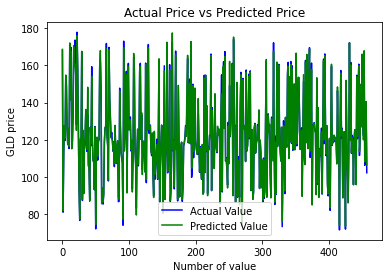

In [37]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of value')
plt.ylabel('GLD price')
plt.legend()
plt.show()